In [171]:
# Gerekli kütüphaneleri içe aktarılması
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import zscore

In [172]:
#Ham veriye ileride ihtiyaç olabileceği için dataframe'in kopyası alınır.
df = pd.read_csv('Melbourne_housing_FULL.csv')
df_copy = df.copy()
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [173]:
df_copy.info() #değişkenlerin bilgileri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [174]:
#Veri seti hakkında daha derin bilgiler
shape = df_copy.shape
size = df_copy.size
ndim = df_copy.ndim

print("Shape: {}".format(shape))
print("Size: {}".format(size))
print("Dimension: {}".format(ndim))

Shape: (34857, 21)
Size: 731997
Dimension: 2


In [175]:
df_copy.isnull().sum() #boş değerlerin olup olmadığının kontrolü

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [176]:
#İstatistiki bilgiler. Outlierları burada biraz tespit edebiliyoruz
df_copy.describe().T


,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [177]:
df_copy.duplicated().sum() #duplike olan veri sayısını buluyoruz

1

In [178]:
duplicate_mask = df_copy.duplicated(keep=False)

df_duplicates = df_copy[duplicate_mask]
df_duplicates #Bu duplike verilerin hangileri olduğuna erişiyorum.

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [179]:
df_copy.drop(df_duplicates.index, inplace=True) #Adres bilgisi gibi unique olması gereken değerler bile aynı olduğundan duplike veri siliniyor
df_copy.duplicated().sum()

0

In [180]:
df_copy.dropna(subset=['Price'], inplace=True) #Model fiyat tahmini üzerine odaklanacağı için NaN değerler droplanıyor


In [181]:
df_copy.nunique()

Suburb             345
Address          26751
Rooms               12
Type                 3
Price             2871
Method               5
SellerG            349
Date                78
Distance           213
Postcode           209
Bedroom2            14
Bathroom            10
Car                 13
Landsize          1557
BuildingArea       662
YearBuilt          151
CouncilArea         33
Lattitude        11366
Longtitude       12275
Regionname           8
Propertycount      336
dtype: int64

In [182]:
#Kategorik ve numerik verileri belirleme
cat_cols = df_copy.select_dtypes(['object']).columns
num_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns

for column in cat_cols:
    df_copy[column] = df_copy[column].astype('category')


print(df_copy.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  category
 1   Address        27247 non-null  category
 2   Rooms          27247 non-null  int64   
 3   Type           27247 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  category
 6   SellerG        27247 non-null  category
 7   Date           27247 non-null  category
 8   Distance       27246 non-null  float64 
 9   Postcode       27246 non-null  float64 
 10  Bedroom2       20806 non-null  float64 
 11  Bathroom       20800 non-null  float64 
 12  Car            20423 non-null  float64 
 13  Landsize       17982 non-null  float64 
 14  BuildingArea   10656 non-null  float64 
 15  YearBuilt      12084 non-null  float64 
 16  CouncilArea    27244 non-null  category
 17  Lattitude      20993 non-null  

In [183]:
columns_to_observe = ['Landsize','BuildingArea']
z_scores = {} # Her sütun için z-score'ları saklayacak boş dictionary

for column in columns_to_observe: # columns_to_observe'daki sütunlar için döngü
  z_score = zscore(df_copy[column])
  z_scores[column] = z_score

threshold = 3 # Eşik değeri

outliers = {} # Outlier değerleri tutacak boş dictionary

for column in columns_to_observe:
  outlier = np.abs(z_scores[column]) > threshold
  outliers[column] = outlier

# Tüm Outlierları birleştirecek boş seri
detected_outliers = pd.Series([False] * len(df), index=df.index)

for col in columns_to_observe:
  detected_outliers |= outliers[col]

# Outlierların sayısı ve verisetinden çıkartılması
sum(detected_outliers)
df_copy = df_copy[~detected_outliers]

<ipython-input-183-f4d278b9561f>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[~detected_outliers]


In [184]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

In [185]:
## Eksik değerleri doldurma

for column in cat_cols:
  df_copy[column] = df_copy[column].fillna(df_copy[column].mode().iloc[0])

for column in num_cols:
  df_copy[column].fillna(df_copy[column].mean(), inplace=True)

In [186]:
print(df_copy.isnull().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


<Figure size 1000x800 with 0 Axes>

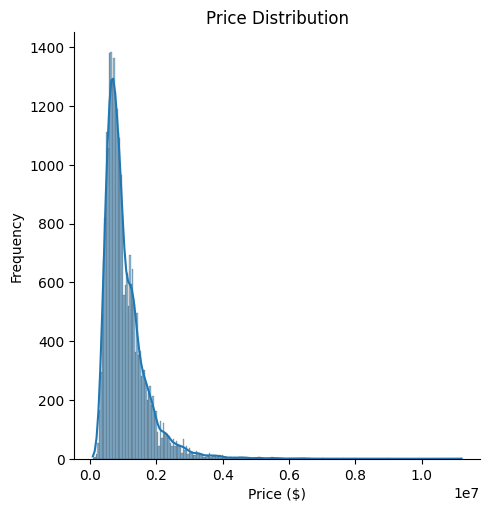

In [187]:
# Histogram grafiğini oluştur
plt.figure(figsize=(10,8))
sns.displot(df_copy['Price'], kde=True)

# Grafik özelliklerini ayarla
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Price Distribution')

# Grafik göster
plt.show()

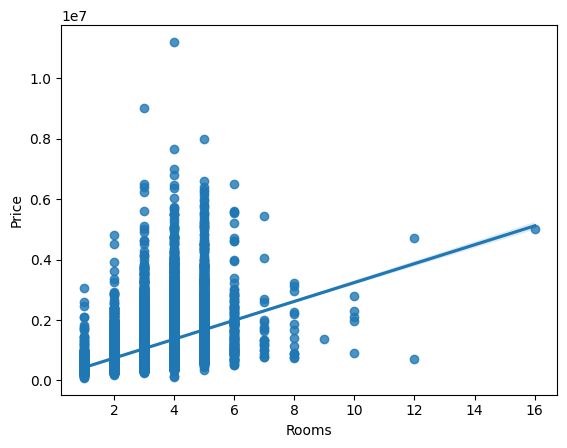

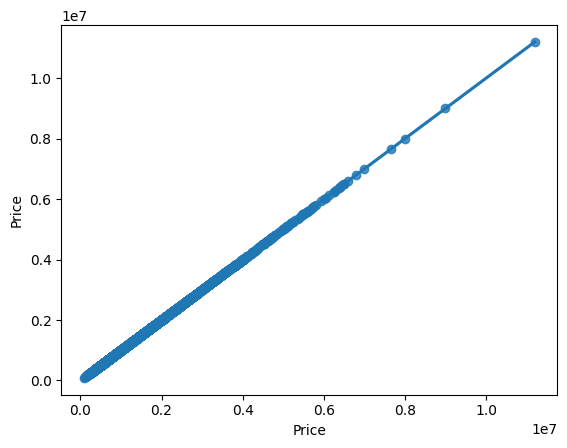

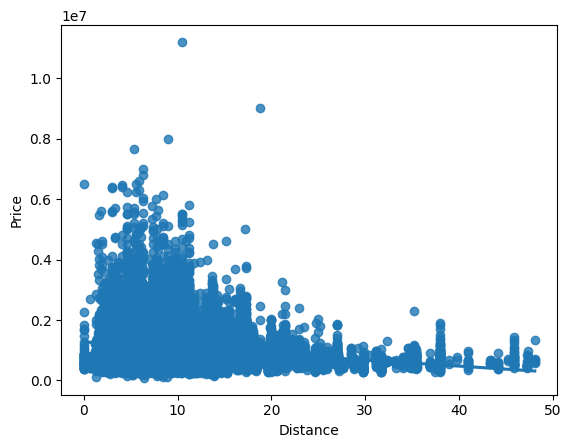

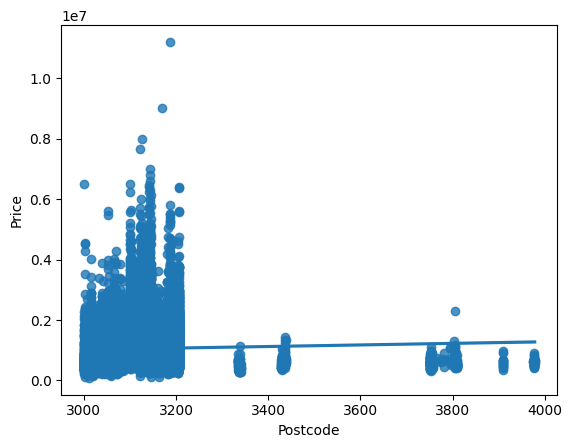

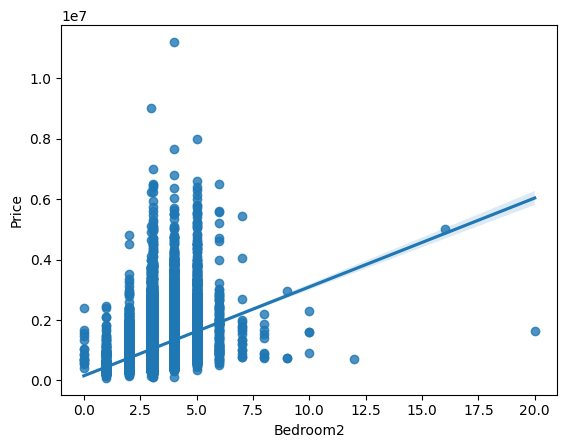

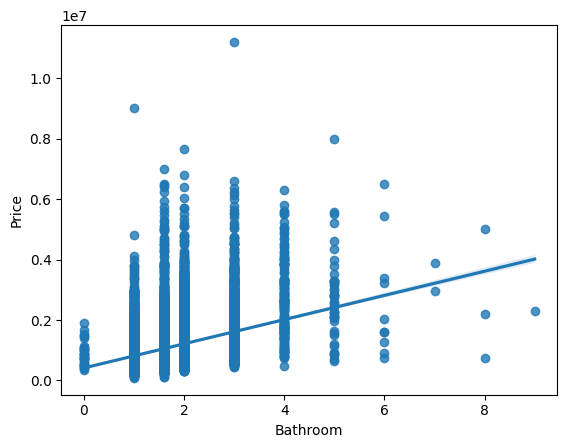

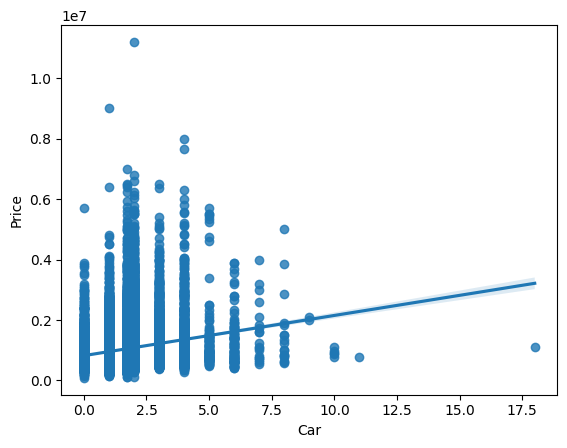

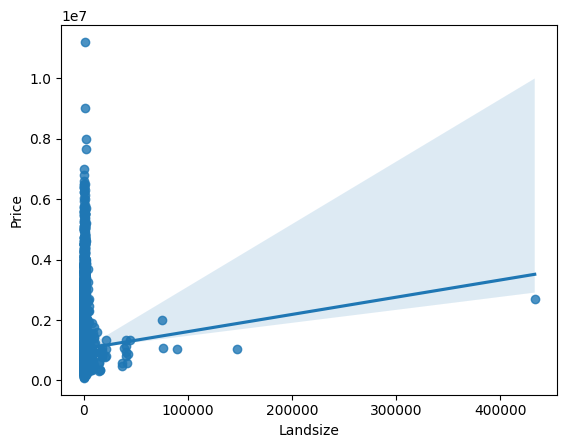

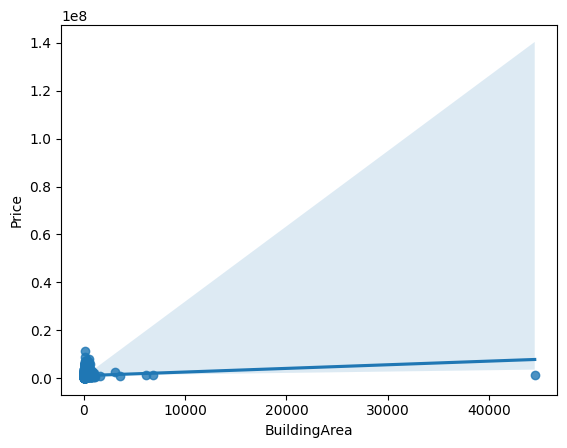

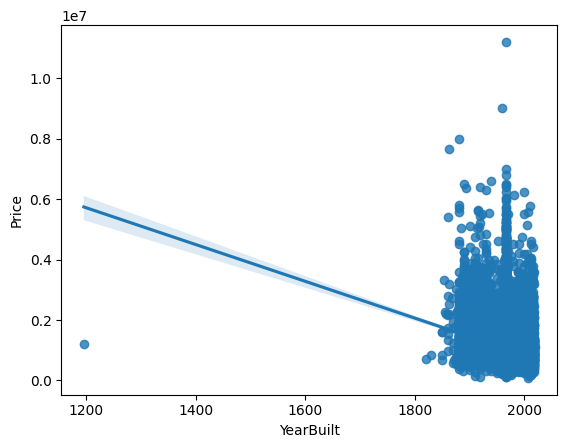

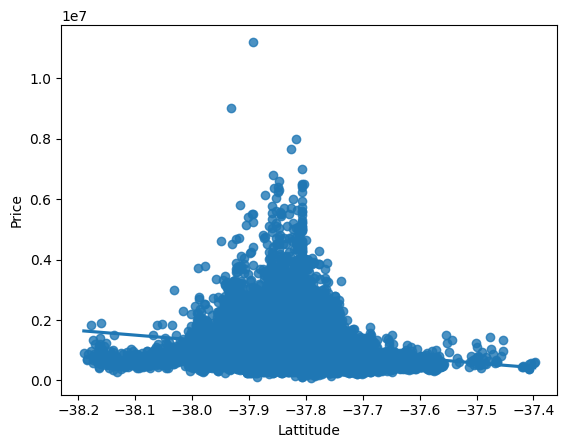

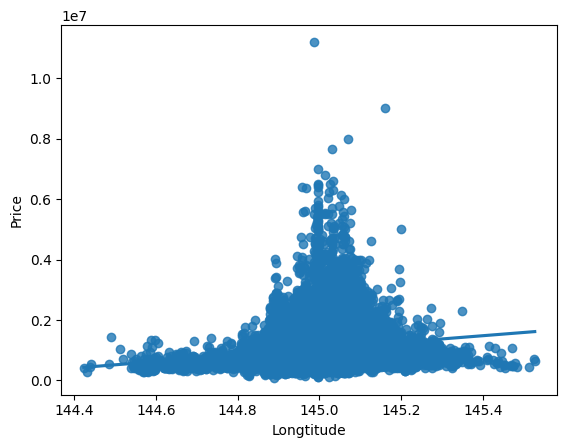

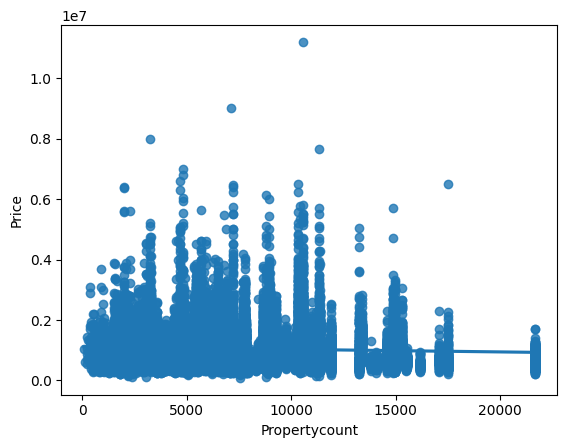

In [188]:
for column in num_cols:
  sns.regplot(data=df_copy, x=column, y='Price')
  plt.show()


#sns.pairplot(data, vars=num_cols)  bu şekilde yapınca ram yetmiyor.
#plt.show()


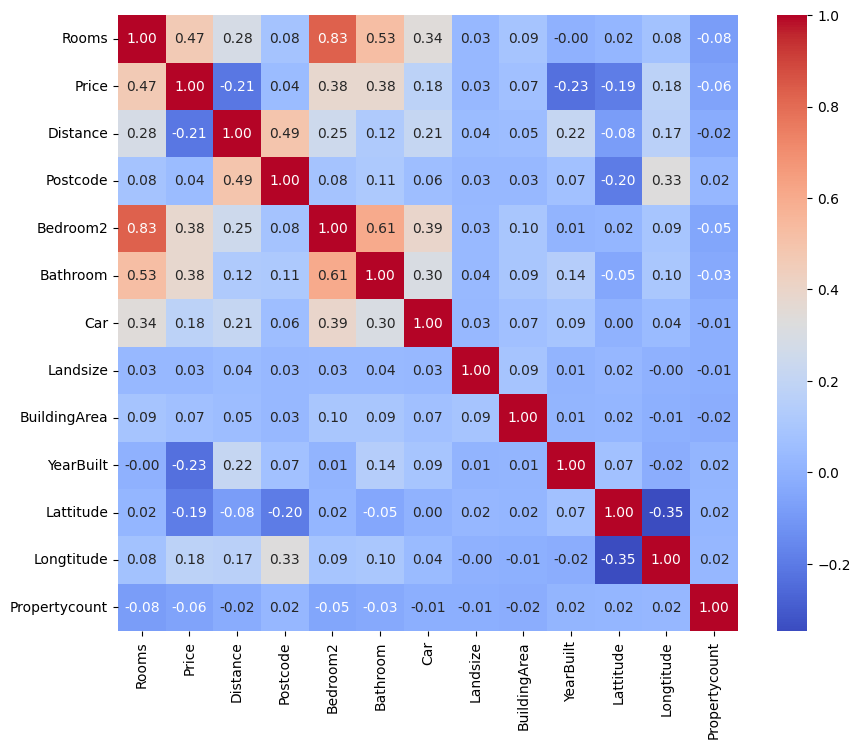

In [189]:
corr = df_copy[num_cols].corr()

plt.figure(figsize=(10, 8))
# Heatmap oluşturma
sns.heatmap(corr,
            cmap='coolwarm',
            annot=True,
            fmt='.2f')


# Show plot
plt.show()

In [190]:
#One Hot Encoding
def one_hot_encoder(dataframe, categorical_col, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_col, drop_first=drop_first)
    return dataframe

ohe_dataframe = one_hot_encoder(df_copy, cat_cols, drop_first=True)

ohe_dataframe.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,156.834586,1966.609153,...,0,1,0,0,1,0,0,0,0,0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.000000,...,0,1,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.000000,...,0,1,0,0,1,0,0,0,0,0
5,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,156.834586,1966.609153,...,0,1,0,0,1,0,0,0,0,0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.000000,...,0,1,0,0,1,0,0,0,0,0


In [191]:
#Label Encoding
le_dataframe = df_copy.copy()

def label_encoding(column_name):
  label_encoder = LabelEncoder()
  le_dataframe[column_name] = label_encoder.fit_transform(df_copy[column_name])

for col in cat_cols:
  label_encoding(col)

le_dataframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,0,25617,2,0,1480000.0,1,32,60,2.5,3067.0,...,1.0,1.0,202.0,156.834586,1966.609153,31,-37.7996,144.9984,2,4019.0
2,0,12162,2,0,1035000.0,1,32,63,2.5,3067.0,...,1.0,0.0,156.0,79.000000,1900.000000,31,-37.8079,144.9934,2,4019.0
4,0,19857,3,0,1465000.0,3,32,64,2.5,3067.0,...,2.0,0.0,134.0,150.000000,1900.000000,31,-37.8093,144.9944,2,4019.0
5,0,18371,3,0,850000.0,0,32,64,2.5,3067.0,...,2.0,1.0,94.0,156.834586,1966.609153,31,-37.7969,144.9969,2,4019.0
6,0,21399,4,0,1600000.0,4,206,65,2.5,3067.0,...,1.0,2.0,120.0,142.000000,2014.000000,31,-37.8072,144.9941,2,4019.0


In [192]:
df_copy = le_dataframe #ikisini birleştirince runtime error alıyorum bu yüzden label encodingle devam.



In [193]:
y = df_copy["Price"]
X = df_copy.drop("Price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)

print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (21797, 20)
Shape of x_test is (5450, 20)
Shape of y_train is (21797,)
Shape of y_test is (5450,)


In [194]:
models_dict = {
  'Lasso': {
    'model': Lasso()
  },
  'LinearRegression': {
    'model': LinearRegression()
  },
  'Ridge': {
    'model': Ridge()
  },
  'ElasticNet': {
    'model': ElasticNet()
  },
  'KNeighborsRegressor': {
    'model': KNeighborsRegressor()
  },
  'RandomForestRegressor': {
    'model': RandomForestRegressor()
  },
  'GradientBoostingRegressor': {
    'model': GradientBoostingRegressor()
  },
  'AdaBoostRegressor': {
    'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
  }
}

In [198]:
#Model eğitimi
for key, item in models_dict.items():
  model = item.get('model')
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  print("Model : {}".format(model))
  print("Mean Absolute Error : {}".format(mae))
  print("Mean Squared Error : {}".format(mse))
  print("Root Mean Square Error : {}".format(rmse))
  print("R2 Score : {}".format(r2))
  print("\n\n")

Model : Lasso()
Mean Absolute Error : 286295.8501911606
Mean Squared Error : 211903095720.2564
Root Mean Square Error : 460329.3339775952
R2 Score : 0.5040994993389813



Model : LinearRegression()
Mean Absolute Error : 286296.31798029447
Mean Squared Error : 211903591759.1847
Root Mean Square Error : 460329.87276428705
R2 Score : 0.5040983384972672



Model : Ridge()
Mean Absolute Error : 286273.89724980877
Mean Squared Error : 211875937183.43054
Root Mean Square Error : 460299.834003262
R2 Score : 0.5041630563718005



Model : ElasticNet()
Mean Absolute Error : 306450.6124554216
Mean Squared Error : 237824998201.11926
Root Mean Square Error : 487673.04436591454
R2 Score : 0.44343646666995373



Model : KNeighborsRegressor()
Mean Absolute Error : 376209.20620183484
Mean Squared Error : 340460948895.21045
Root Mean Square Error : 583490.3160252194
R2 Score : 0.20324545312189612



Model : RandomForestRegressor()
Mean Absolute Error : 172323.79001651375
Mean Squared Error : 96648994424.